# Importing Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Importing Dataset

In [89]:
df=pd.read_csv('wine_data.csv')

# Q1

**Most Frequently occuring wine quality**

In [90]:
quality=df['quality'].values
unique, counts = np.unique(quality, return_counts=True)
index = np.argmax(counts)
print("Most Frequently occuring Wine Quality:",unique[index])

Most Frequently occuring Wine Quality: 5


**Min and Max in Quality Column**

In [91]:
print("Minimum in Quality Column:",np.min(quality))
print("Maximum in Quality Column:",np.max(quality))

Minimum in Quality Column: 3
Maximum in Quality Column: 8


#Q2 Correlations

**Fixed Acidity vs quality**

In [92]:
corr=np.corrcoef(df['fixed acidity'].values,quality)
print(corr)


[[1.         0.12405165]
 [0.12405165 1.        ]]


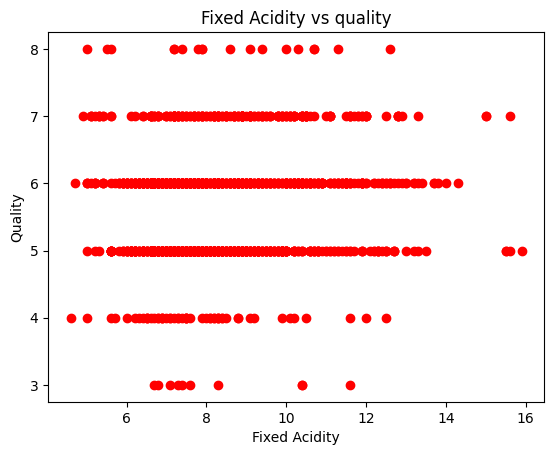

In [93]:
plt.scatter(df['fixed acidity'].values,quality,color='red')
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')
plt.title('Fixed Acidity vs quality')
plt.show()

**Alcohol Content vs Quality**

In [94]:
corr=np.corrcoef(df['alcohol'].values,quality)
print(corr)


[[1.         0.47616632]
 [0.47616632 1.        ]]


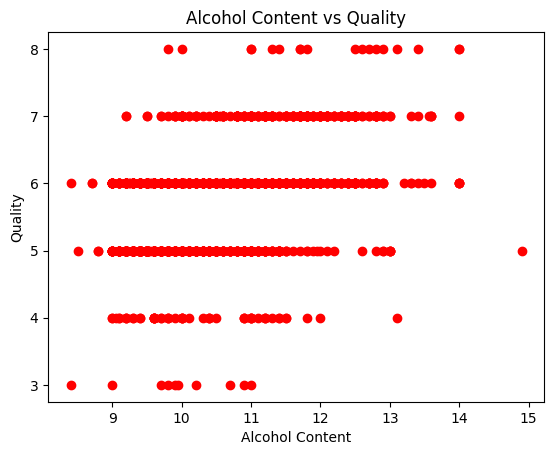

In [95]:
plt.scatter(df['alcohol'].values,quality,color='red')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.title('Alcohol Content vs Quality')
plt.show()

**Free Sulfur Dioxide vs Quality**

In [96]:
corr=np.corrcoef(df['free sulfur dioxide'].values,quality)
print(corr)


[[ 1.         -0.05065606]
 [-0.05065606  1.        ]]


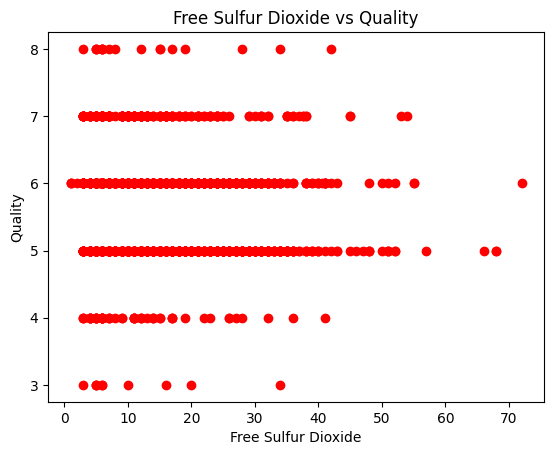

In [97]:
plt.scatter(df['free sulfur dioxide'].values,quality,color='red')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Quality')
plt.title('Free Sulfur Dioxide vs Quality')
plt.show()

#Q3 Average Residual Sugar

**For Best Quality Wine**

In [98]:
k=[]
max=quality.max()
for i in range(len(quality)):
  if quality[i]==max:
    k+=[i]
res_max=df['residual sugar'].values[k]
print("The average `residual sugar` for the best quality wine:",res_max.mean())

The average `residual sugar` for the best quality wine: 2.5777777777777775


**For Lowest quality wine**

In [99]:
k=[]
min=quality.min()
for i in range(len(quality)):
  if quality[i]==min:
    k+=[i]
res_min=df['residual sugar'].values[k]
print("The average `residual sugar` for the lowest quality wine:",res_min.mean())

The average `residual sugar` for the lowest quality wine: 2.6350000000000002


#Q4 Effect of Volatile Acidity on Quality

In [100]:
corr=np.corrcoef(df['volatile acidity'].values,quality)
print(corr)


[[ 1.         -0.39055778]
 [-0.39055778  1.        ]]


**As we can see, that the correlation matrix tells usa that Volatile Acidity does have an effect on the Quality of the wine.**

**The direction is negative and the strength is weak, since it is close to 0.**

**Graph**

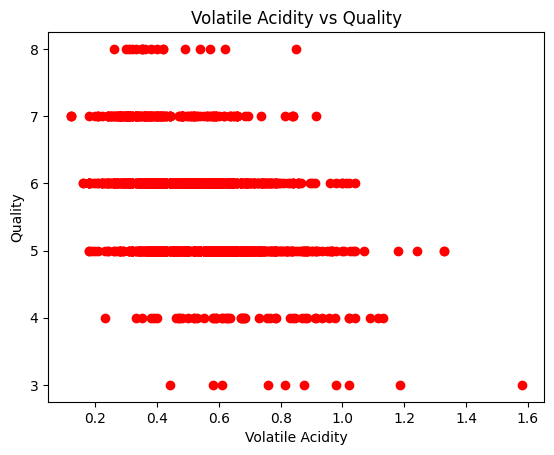

In [101]:
plt.scatter(df['volatile acidity'].values,quality,color='red')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('Volatile Acidity vs Quality')
plt.show()

#Q5 Training Model

**Data Preprocessing**

In [102]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [103]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X=imputer.transform(X)

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [105]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#1.Decision-Tree Model

In [106]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)


**Confusion matrix and Accuracy Score**

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy Score:",end="")
accuracy_score(y_test,y_pred)

[[  0   1   1   0   0   0]
 [  1   3   6   3   1   0]
 [  3  11 109  39   7   0]
 [  2   4  35 110  19   0]
 [  0   1   4  12  20   3]
 [  0   0   0   1   4   0]]
Accuracy Score:

0.605

#2. Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)# Taking 20 Decision Trees

In [109]:
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy Score:",end="")
accuracy_score(y_test,y_pred)

[[  0   0   1   1   0   0]
 [  0   0  10   4   0   0]
 [  0   0 135  31   3   0]
 [  0   1  35 122  12   0]
 [  0   0   3  14  21   2]
 [  0   0   0   2   3   0]]
Accuracy Score:

0.695

**As we can observe, that the Accuracy Score for the Random Forest (for 20 decision trees) is more than of a single decision tree.**

**Also, we observe that as we increase the number of decision trees, the accuracy increases**